# 1. Import libraries and data Exploring

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r'C:\Users\isa.zeynalov\Downloads\Mall_Customers.xlsx')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [7]:
df.apply(pd.unique).to_frame(name="Uniques")

,Uniques
CustomerID,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
Genre,"[Male, Female]"
Age,"[19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 2..."
Annual Income (k$),"[15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 28, 2..."
Spending Score (1-100),"[39, 81, 6, 77, 40, 76, 94, 3, 72, 14, 99, 15,..."


In [8]:
df['CustomerID'].duplicated().value_counts()

CustomerID
False    200
Name: count, dtype: int64

In [9]:
df.rename(columns={'Genre':'Gender'},inplace=True)

# 2. Data Visualization

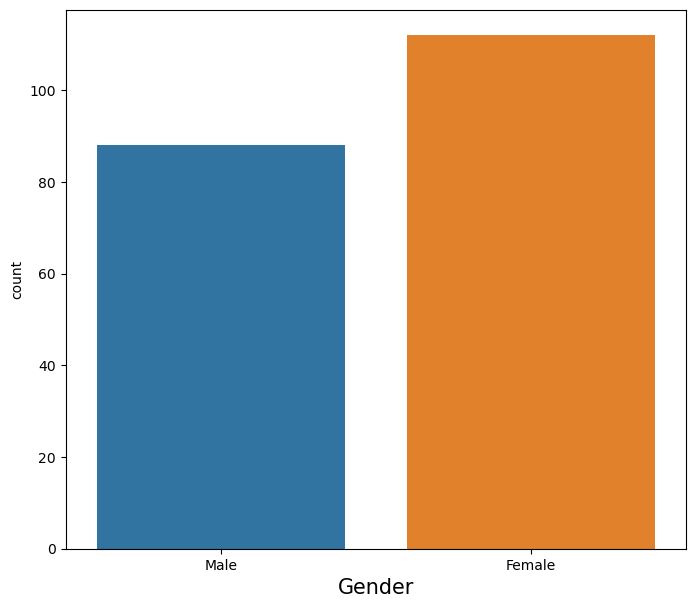

In [10]:
plt.figure(figsize=(8, 7))
sns.countplot(x='Gender', data=df)
plt.xlabel('Gender', fontsize=15)
plt.show()

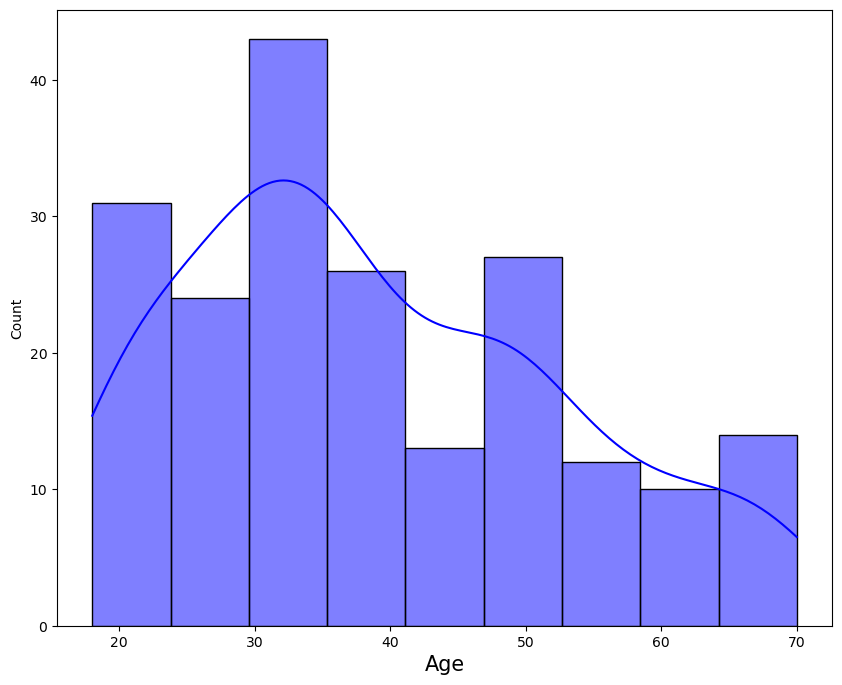

In [11]:
plt.figure(figsize=(10,8))
sns.histplot(df['Age'],color='Blue',kde=True)
plt.xlabel('Age',fontsize=15)
plt.show()

In [12]:
df.drop(columns = ["CustomerID"],axis=1,inplace = True)

In [13]:
df.groupby('Gender').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


# 3. Machine Learning

In [14]:
df.iloc[:,[2,3]].head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [15]:
X = df.iloc[:,[2,3]].values
y = df['Gender']

In [16]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
y = le.transform(y)

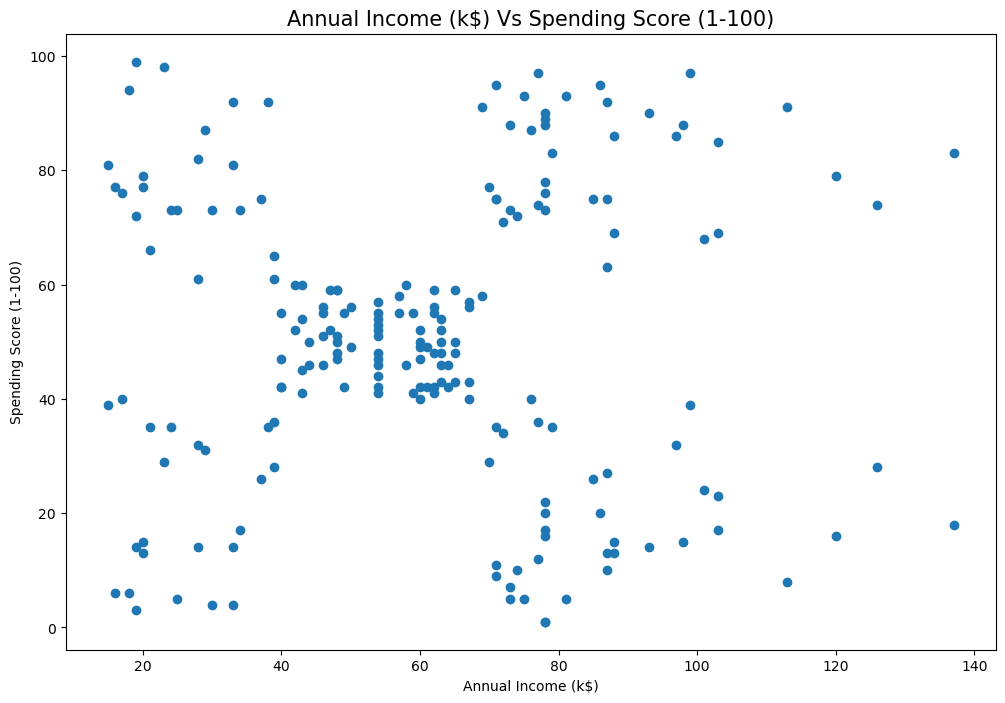

In [17]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income (k$) Vs Spending Score (1-100)",fontsize = 15)
plt.show()

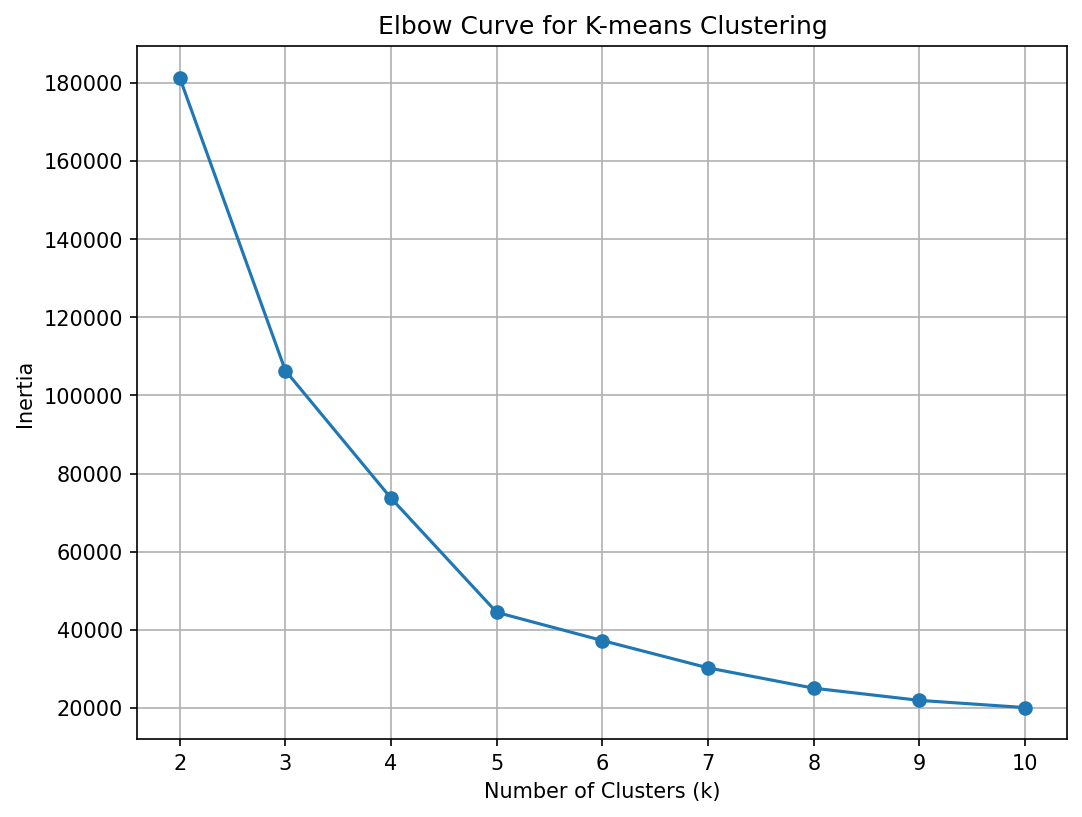

In [18]:
# Calculate inertia (sum of squared distances) for different values of k
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init= 10, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6),dpi=150)
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-means Clustering')
plt.grid(True)
plt.show()

In [19]:
kmeans = KMeans(n_clusters=5,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

print(f'Inertia: {kmeans.inertia_}')

Result: 66 out of 200 samples were correctly labeled.
Accuracy score: 0.33
Inertia: 44448.45544793371


In [20]:
df['Cluster'] = kmeans.labels_

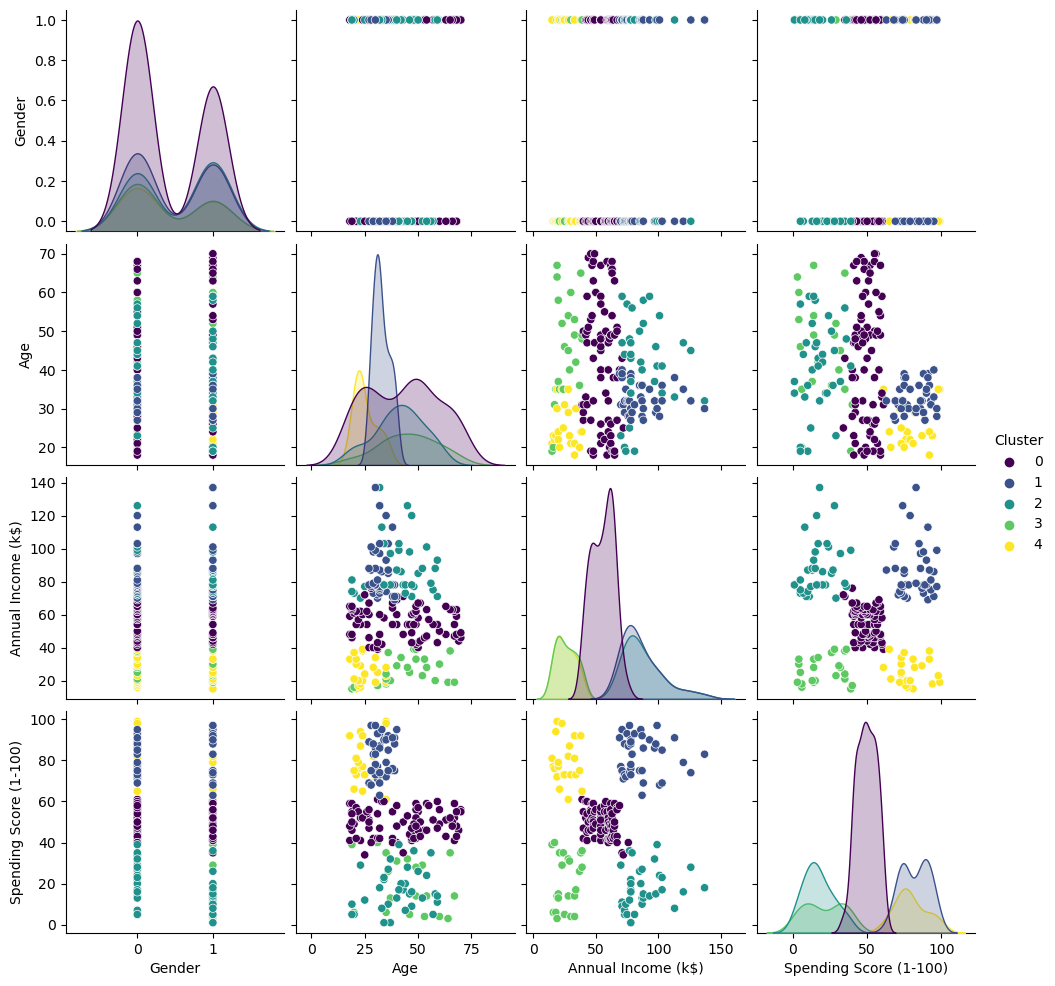

In [21]:
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.show()

**Results and conclusion:**


**1. In this project, I have implemented the most popular unsupervised clustering technique called K-Means Clustering.**

**2. I have applied the elbow method and find that k=5 (k is number of clusters) can be considered a good number of cluster to cluster this data.**

**3. I have find that the model has very lower inertia of 44448.4554 So, this is not a good model fit to the data.**

**4. Hence, we can conclude that k=5 being the optimal number of clusters.**